In [1]:
%matplotlib inline
import tellurium as te
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# Euler evaluation of lac operon model
def nextValue(i_int, p, i_ext=1.5, dt=0.1):
    a = 0.5; b = 0.03; c = 0.8; d = 0.9; i_ext = 1.0
    i_int_dot = a*(i_ext - i_int)*p - b*i_ext
    p_dot = c*i_int - d*p
    new_i_int = max(0, i_int + i_int_dot*dt)
    new_p = max(0, p + p_dot*dt)
    return new_i_int, new_p

In [17]:
def evaluate(count, initial_i_int=0.1, initial_p=0.1, **kwargs):
    i_ints = [initial_i_int]
    ps = [initial_p]
    for n in range(count):
        i_int, p = nextValue(i_ints[n], ps[n], **kwargs)
        i_ints.append(i_int)
        ps.append(p)
    return i_ints[0:-1], ps[0:-1]

In [65]:
def plot(dt=0.1):
    max_time = 100
    count = int(max_time / dt)
    i_ints, ps = evaluate(count, dt=dt)
    times = [dt*v for v in range(count)]
    plt.plot(times, i_ints, times, ps )
    plt.legend(['i_int', 'p'])
    plt.xlabel('time')
    plt.ylabel('concentration')
    plt.title("dt = %2.4f" % dt)

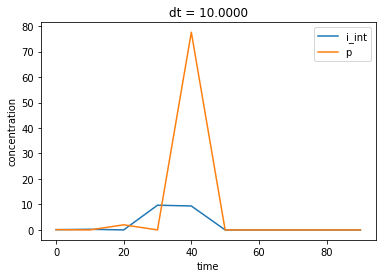

In [70]:
plot(10)

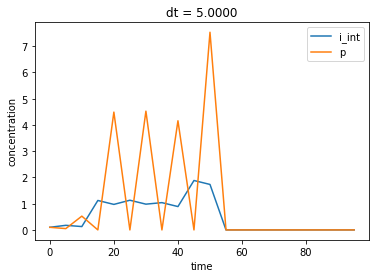

In [71]:
plot(5)

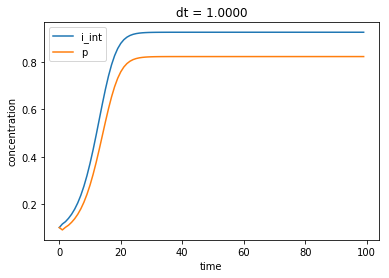

In [72]:
plot(1)

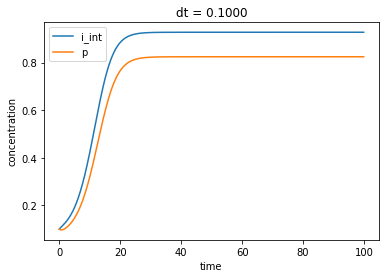

In [73]:
plot(0.1)

## Python Solver

In [74]:
from scipy.integrate import odeint

In [77]:
# Constants
a = 0.5; b = 0.03; c = 0.8; d = 0.9; i_ext = 1.0
def nextValue(y, dt=0.1):
    i_int = y[0]
    p = y[1]
    i_int_dot = a*(i_ext - i_int)*p - b*i_ext
    p_dot = c*i_int - d*p
    new_i_int = max(0, i_int + i_int_dot*dt)
    new_p = max(0, p + p_dot*dt)
    return [new_i_int, new_p]

In [75]:
y0 = [0.1, 0.1]
t = np.linspace(0, 10, 101)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

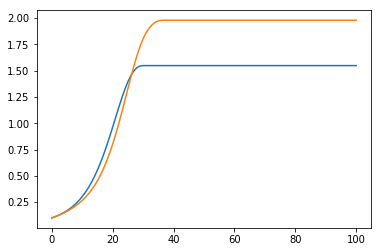

In [79]:
plt.plot(range(101), odeint(nextValue, y0, t))

# A -> B

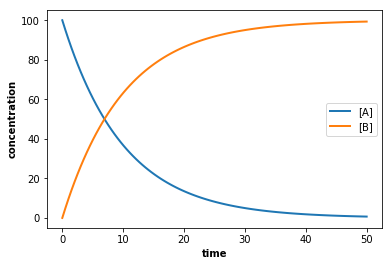

In [80]:
te.setDefaultPlottingEngine('matplotlib')
model = """
model test
    species A, B;
    A = 100.0;
    B = 0.0;
    J1: A -> B; k1*A;
    k1 = 0.1;
end
"""
r = te.loada(model)
r.simulate(0, 50, 100)
r.plot(xtitle="time", ytitle="concentration")

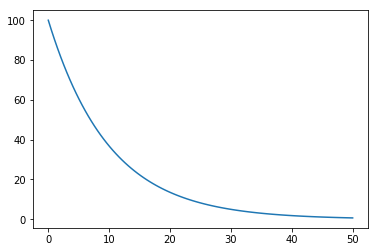

In [86]:
# Solution to the differential equation
def a2b(A0, k, tv):
    return A0*np.exp(-k*tv)
tv = np.linspace(0.0, 50, 100)
plt.plot(tv, a2b(100, 0.1, tv))

# A <--> B

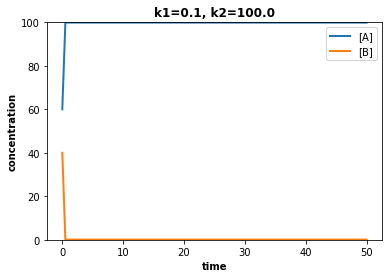

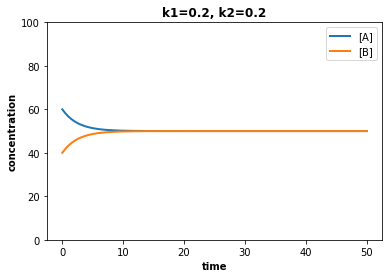

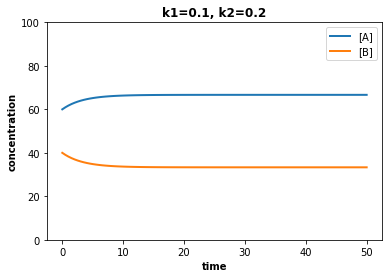

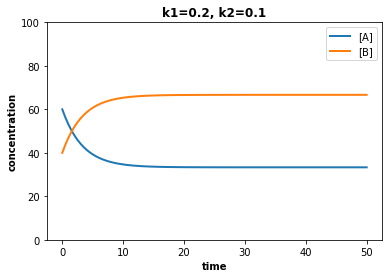

In [102]:
te.setDefaultPlottingEngine('matplotlib')
model = """
model test
    species A, B;
    A = 60.0;
    B = 40.0;
    J1: A -> B; k1*A;
    J2: B -> A; k2*B;
    k1 = 0.1;
    k2 = 0.2
end
"""
for params in [ [0.1, 100], [0.2, 0.2], [0.1, 0.2], [0.2, 0.1]]:
    # load models
    r = te.loada(model)
    r.k1 = params[0]
    r.k2 = params[1]
    # simulate from 0 to 50 with 100 
    r.simulate(0, 50, 100)
    # plot the simulation
    r.plot(xtitle="time", ytitle="concentration", title="k1=%2.1f, k2=%2.1f" % (r.k1, r.k2),
          ylim=[0, 100])

In [94]:
r.k1

0.1

In [ ]:
# Solution to the differential equation
def a2b2a(A0, B0, k1, k2, tv):
    return A0*np.exp(-k*tv)
tv = np.linspace(0.0, 50, 100)
plt.plot(tv, a2b(100, 0.1, tv))

# X0 --> A <--> B --> X1

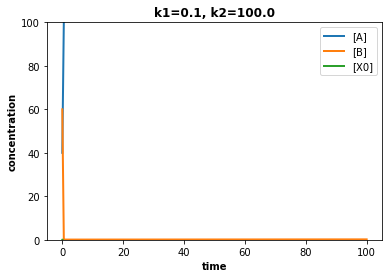

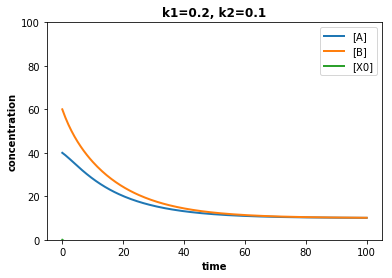

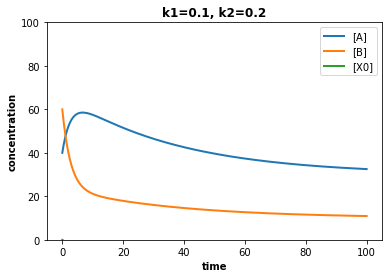

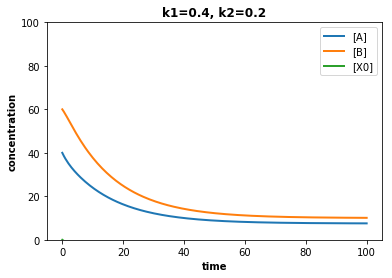

In [109]:
# Deterministic simulation
te.setDefaultPlottingEngine('matplotlib')

model = """
model test
    species A, B;

    A = 40;
    B = 60;
    X0 -> A; v1
    J1: A -> B; k1*A;
    J2: B -> A; k2*B;
    J3: B -> ; k3*B

    k1 = 0.1;
    k2 = 0.2;
    k3 = 0.1
    v1 = 1
end
"""
for params in [ [0.1, 100], [0.2, 0.1], [0.1, 0.2], [0.4, 0.2]]:
    # load models
    r = te.loada(model)
    r.k1 = params[0]
    r.k2 = params[1]
    # simulate from 0 to 50 with 100 
    r.simulate(0, 100, 200)
    # plot the simulation
    r.plot(xtitle="time", ytitle="concentration", title="k1=%2.1f, k2=%2.1f" % (r.k1, r.k2),
          ylim=[0, 100])